In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("FoDS-Assignment-2.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0


In [4]:
df.isna().sum()

bedrooms          0
bathrooms         0
sqft_living      14
sqft_lot          0
floors           13
waterfront        0
view              0
condition         0
grade             0
sqft_above       14
sqft_basement     0
sqft_living15     0
sqft_lot15        0
price             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [ ]:
sns.heatmap(data = df.corr())

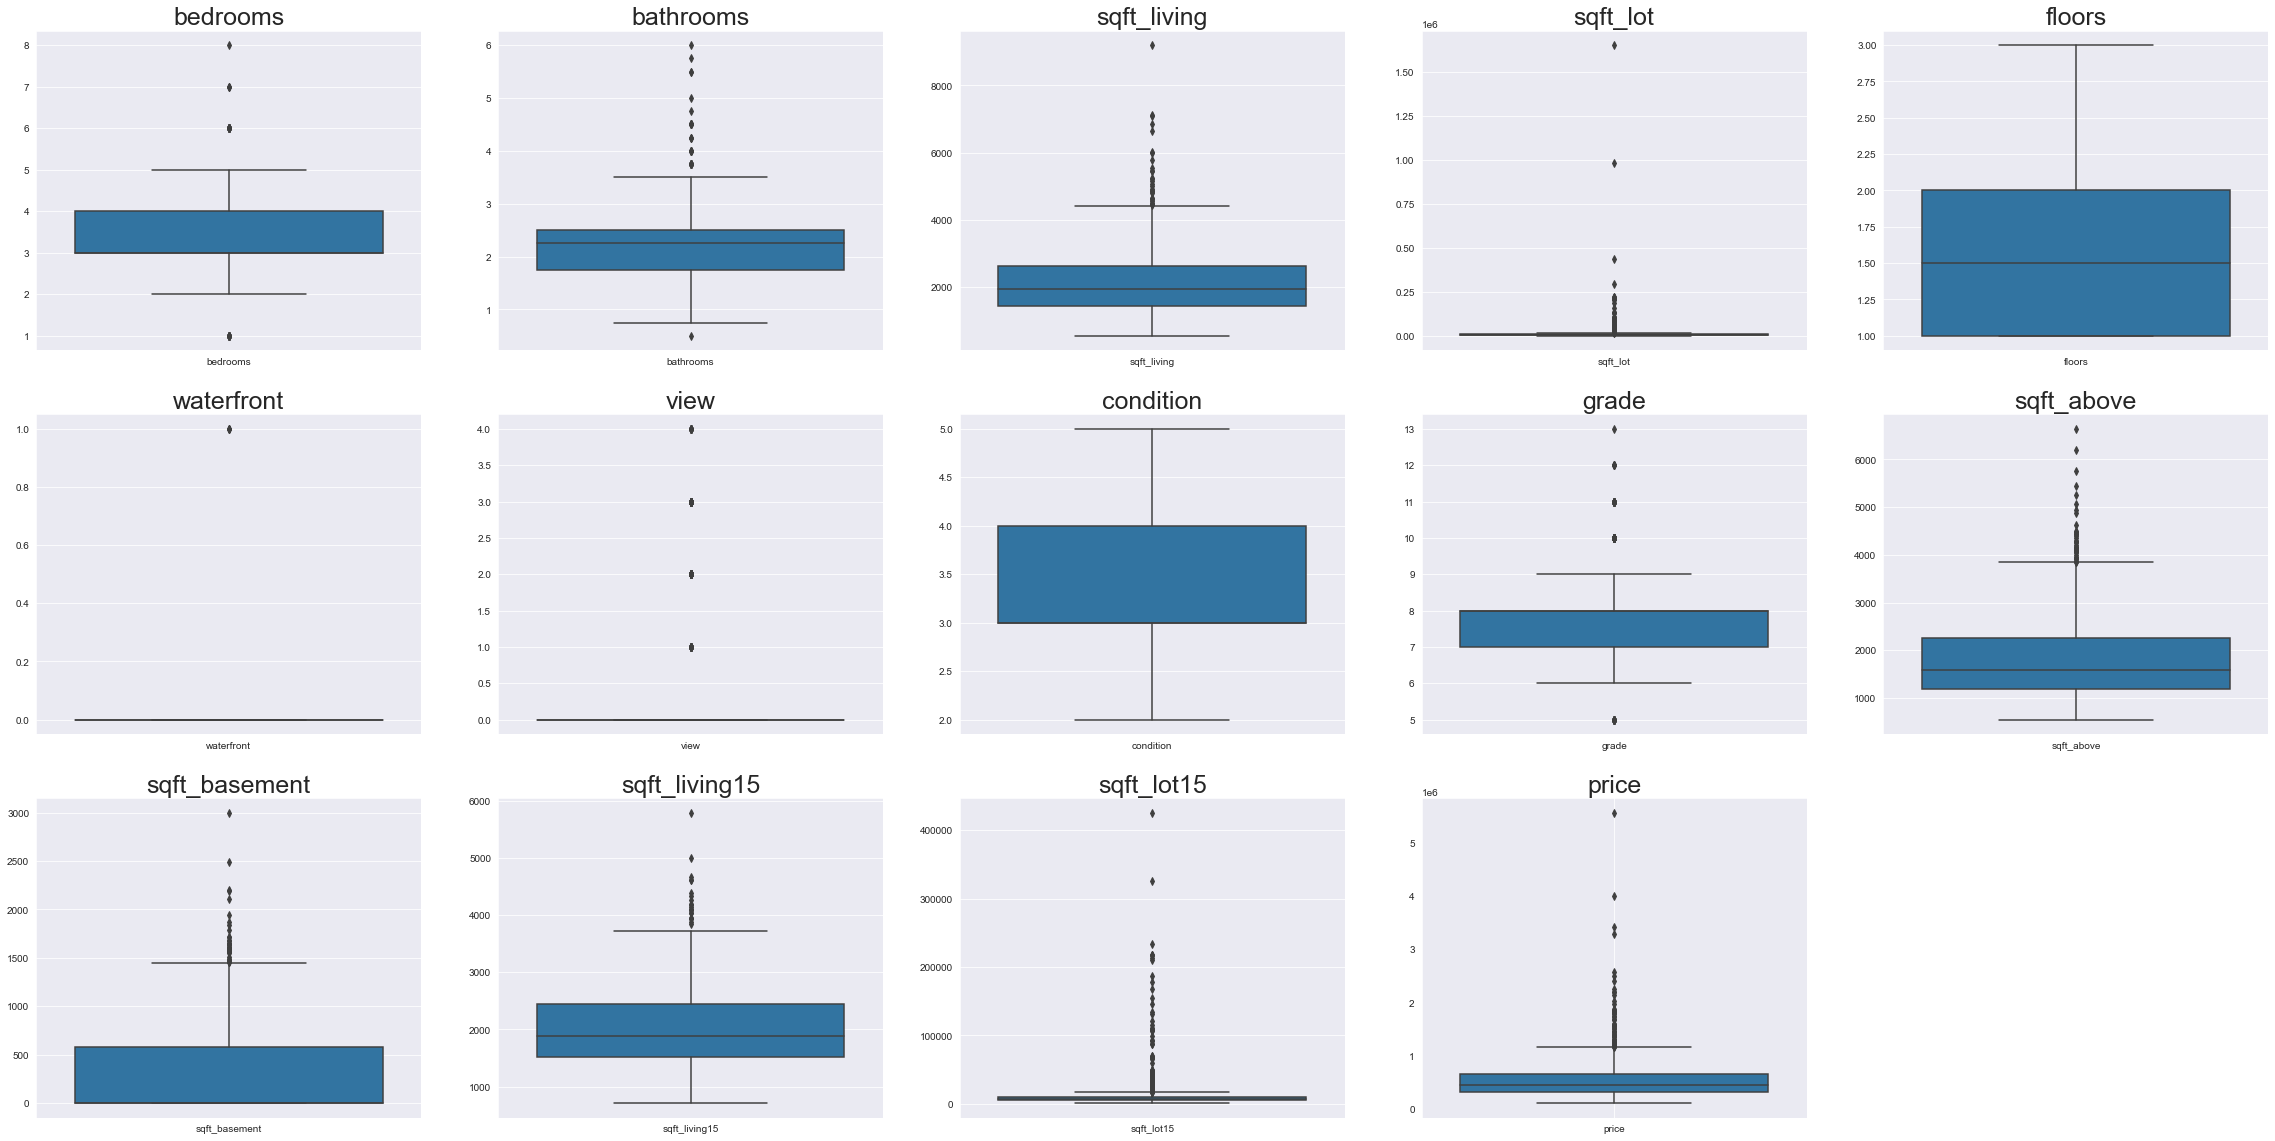

In [41]:
fig = plt.figure(figsize =(40,20))
i=1
for s in df.columns:
    plt.subplot(3,5, i)
    plt.title(s,fontsize=25)
    sns.boxplot(data=df[[s]])
    i=i+1
plt.grid()

In [ ]:
fig = plt.figure(figsize=(40,40))
plt.rc('axes', labelsize=25)
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(df[col], df["price"])
    plt.xlabel(col)
    plt.ylabel("price")
plt.show()

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


def preprocess(data, f, scalingMethod="normalize", outlierMethod="knn", missingValues="drop"):
    EPS = 1e-12

    if missingValues == "drop":
        data = data.dropna()
    
    if outlierMethod == "knn":
        scaled_data = data.iloc[:,:-1]
        scaled_data = (scaled_data - scaled_data.mean())/scaled_data.std()
        nbrs = NearestNeighbors()
        nbrs.fit(scaled_data)
        distances, indexes = nbrs.kneighbors(scaled_data)
        outlier_index = np.where(distances.mean(axis = 1) > 1)
        #print(outlier_index.shape)
        # print(outlier_index)
        # print(data.index[outlier_index[0]])
        data = data.drop(data.index[outlier_index[0]])

    train = data.sample(frac=f, random_state=0)
    test = data.drop(train.index)    
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]
    X_test = test.iloc[:, :-1]
    y_test = test.iloc[:, -1]

    if scalingMethod == "normalize":
        mean = X_train.mean()
        sd = X_train.std()
        X_train = (X_train - mean) / (sd + EPS)
        X_test = (X_test - mean) / (sd + EPS)
        return np.array(X_train), np.array(y_train).reshape(-1,1), np.array(X_test), np.array(y_test).reshape(-1,1)
    elif scalingMethod == "scale":
        minval = X_train.min()
        diff = X_train.max() - X_train.min()
        X_train = (X_train - minval) / (diff + EPS)
        X_test = (X_test - minval) / (diff + EPS)
        return np.array(X_train), np.array(y_train).reshape(-1,1), np.array(X_test), np.array(y_test).reshape(-1,1)

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, r2_score

X_train, y_train, X_test, y_test = preprocess(df, 0.75)
model = LR()
model.fit(X_train, y_train)
print(model.predict(X_test) - y_test)
mse = mean_squared_error(y_test, model.predict(X_test))
r2_score(y_test, model.predict(X_test))


[[-170080.35748248]
 [  61790.28445084]
 [-149685.19062717]
 [ 222058.75488085]
 [  13606.9938286 ]
 [  23939.34028509]
 [-333548.76359621]
 [ -58423.63312402]
 [  52495.09939265]
 [ 112360.23476457]
 [ -19107.45993018]
 [ -77300.35151966]
 [-317268.89662223]
 [  19735.30043802]
 [  -3357.85117463]
 [-162622.10435836]
 [  78865.55545327]
 [ -29565.6819739 ]
 [ -15027.48356032]
 [ 216711.30351078]
 [-118929.52241405]
 [-164068.66975427]
 [ -89542.09035128]
 [   4119.60805103]
 [ 122503.14579338]
 [ 171970.74769537]
 [ -88669.88759914]
 [   6988.33681847]
 [ -19826.3811581 ]
 [-148307.44862324]
 [ 312800.50686815]
 [ -19011.73724414]
 [ 153595.73106123]
 [-821097.70392492]
 [ -77509.58101555]
 [-334550.06783255]
 [ 209171.27834451]
 [ 134909.83718789]
 [-136903.22413717]
 [ 115816.86041206]
 [ -63290.53090596]
 [  -7064.16783464]
 [ -32689.0162735 ]
 [ 188229.84449237]
 [  11461.25500927]
 [ 132283.48092786]
 [ -58056.9350601 ]
 [-206924.83416124]
 [-193431.97607536]
 [ 109603.26410914]


0.4315616139284577

In [17]:
class LinearRegression:

    def __init__(self, X, y):
            self.X = X #(n,d)
            self.y = y #(n,1)
            self.W = np.zeros((1, X.shape[1])) #(1,d)
            self.b = 1

    def fitGD(self, n_iter=1000, lr=0.01, graph=False):
        mse = []
        for i in tqdm(range(n_iter)):
            yp = self.predict(self.X)
            mse.append(self.MSE(self.y, yp))
            # print(mse[-1])
            grad = (1/self.X.shape[0])*((self.X.T)@(yp-self.y)).T #(d,n)*(n,1) = (d,1)
            self.W = self.W - lr * grad
            self.b = self.b - lr * np.mean(yp-self.y)
        if(graph == True):
            plt.plot(mse)
            plt.show()
        return self.W, self.b
    
    def predict(self, X):
        return (X@self.W.T + self.b)

    def MSE(self, y, yp):
        return 0.5*np.mean((y-yp)**2)
    
    def RMSE(self, y, yp):
        return np.sqrt(self.MSE(y, yp))


In [72]:
X_train, y_train, X_test, y_test = preprocess(df, 0.75)
model = LinearRegression(X_train, y_train)
model.fitGD(lr=0.1, graph=True)

ValueError: Index data must be 1-dimensional

In [36]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_percentage_error

def GFFS(X_train, y_train, X_test, y_test):
    d = X_train.shape[1]
    remaining = list(range(d))
    selected = []
    best_n_feature_MSE = []
    for i in range(d):
        min_mse = 1e100
        min_j = -1
        max_r2 = 0
        for j in remaining:
            cur_features = selected + [j]
            X_train_cur = X_train[:,cur_features]
            X_test_cur = X_test[:, cur_features]
            model = LR()
            model.fit(X_train_cur, y_train)
            mse = mean_absolute_percentage_error(y_test, model.predict(X_test_cur))
            #model = LinearRegression(X_train_cur, y_train)
            #model.fitGD(lr=0.1,n_iter=10000)
            #mse = model.MSE(y_test,model.predict(X_test_cur))
            if mse < min_mse:
                min_mse = mse
                min_j = j
                max_r2 = r2_score(y_test, model.predict(X_test_cur))
        best_n_feature_MSE.append(min_mse)
        selected.append(min_j)
        remaining.remove(min_j)
        print((min_mse, min_j, max_r2))
    return selected, best_n_feature_MSE



ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\Nandan H R\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\__init__.py)

In [35]:
X_train, y_train, X_test, y_test = preprocess(df, 0.75)
selected, best_n_feature_MSE = GFFS(X_train, y_train, X_test, y_test)
print(selected)
np.array(df.columns)[selected]

(25482489135.383522, 8, 0.41118397278850927)
(24090714446.81574, 2, 0.44334328181605953)
(23825687066.72685, 12, 0.4494671878527554)
(23420513888.371056, 1, 0.4588293996816164)
(23118132361.870075, 11, 0.46581643647345117)
(23118132361.870075, 5, 0.46581643647345117)
(23143241394.573406, 6, 0.46523624978898126)
(23164512611.5109, 3, 0.46474474233126994)
(23214362829.968258, 0, 0.4635928686884817)
(23278459443.87509, 7, 0.4621118079742862)
(24221819505.452522, 9, 0.44031387760975504)
(24204528268.788597, 10, 0.44071342088921783)
(24512979840.196194, 4, 0.43358612543945063)
[8, 2, 12, 1, 11, 5, 6, 3, 0, 7, 9, 10, 4]


array(['grade', 'sqft_living', 'sqft_lot15', 'bathrooms', 'sqft_living15',
       'waterfront', 'view', 'sqft_lot', 'bedrooms', 'condition',
       'sqft_above', 'sqft_basement', 'floors'], dtype=object)

In [ ]:
#from sklearn.linear_model import LinearRegression as LR
#from sklearn.metrics import mean_squared_error

def GBFS(X_train, y_train, X_test, y_test):
    d = X_train.shape[1]
    removed = [-1]
    selected = list(range(d))
    model = LR()
    model.fit(X_train, y_train)
    best_n_feature_MSE = [mean_squared_error(y_test, model.predict(X_test))]
    for i in range(d-1):
        min_mse = 1e100
        min_j = -1
        for j in selected:
            cur_features = [x for x in selected if x != j]
            X_train_cur = X_train[:, cur_features]
            X_test_cur = X_test[:, cur_features]
            model = LR()
            model.fit(X_train_cur, y_train)
            mse = mean_squared_error(y_test, model.predict(X_test_cur))
            if mse < min_mse:
                min_mse = mse
                min_j = j
        best_n_feature_MSE.append(min_mse)
        selected.remove(min_j)
        removed.append(min_j)
        print((min_mse, min_j))
    removed.append(selected[0])
    return removed, best_n_feature_MSE

In [20]:
X_train, y_train, X_test, y_test = preprocess(df, 0.75)
selected, best_n_feature_MSE = GFFS(X_train, y_train, X_test, y_test)
print(selected)
np.array(df.columns)[selected]


NameError: name 'GFFS' is not defined

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(df, 0.75)
removed, best_n_feature_MSE = GBFS(X_train, y_train, X_test, y_test)
print(removed)
np.array(df.columns)[removed[1:]]

In [ ]:
f_list = np.arange(0,13,1)
f = []
for i in range(1,14):
    f.append(f_list)
    f_list = f_list[f_list != removed[i]]
print("Feature Subsets (GBFS)")
for i in range(len(f)):
    print("Features",np.array(df.columns)[f[i]])
    print("MSE",best_n_feature_MSE[i])

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(x=(df.columns)[removed[1:]],y=best_n_feature_MSE,marker='o')
plt.xticks(rotation=90)
plt.show()